## Data Aggregation

I will begin by ingesting some data from NYPD Motor Vehicle Collision Dataset into a pandas DataFrame. I will limit this with 3000000 rows.

In [15]:
import pandas as pd
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=3000000")

In [2]:
datanyc.head(20)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2919091,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,...,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,...,Other Vehicular,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
5,2012-07-01T00:00:00.000,9:30,BROOKLYN,11219,40.626826,-73.996790,POINT (-73.9967902 40.626826),61 STREET,NEW UTRECHT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,129899,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
6,2012-07-01T00:00:00.000,9:40,BRONX,10462,40.839882,-73.857658,POINT (-73.8576576 40.8398819),METROPOLITAN AVENUE,MAPLE DRIVE,NaN,...,Unspecified,NaN,NaN,NaN,80827,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
7,2012-07-01T00:00:00.000,9:39,BROOKLYN,11226,40.646518,-73.958105,POINT (-73.958105 40.6465177),TILDEN AVENUE,FLATBUSH AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147454,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
8,2012-07-01T00:00:00.000,9:59,BRONX,10452,40.835397,-73.920305,POINT (-73.920305 40.835397),EAST 167 STREET,GERARD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,85154,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
9,2012-07-01T00:00:00.000,9:40,QUEENS,11370,40.758743,-73.890690,POINT (-73.8906895 40.7587426),31 AVENUE,77 STREET,NaN,...,Unspecified,NaN,NaN,NaN,279639,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


Let's take a look at the number of unique values for each variable in our dataset:

In [3]:
datanyc.nunique()

date                                2684
time                                1440
borough                                5
zip_code                             444
latitude                          115908
longitude                          91892
location                          209425
on_street_name                     11564
off_street_name                    18142
cross_street_name                 139909
number_of_persons_injured             27
number_of_persons_killed               7
number_of_pedestrians_injured         13
number_of_pedestrians_killed           4
number_of_cyclist_injured              5
number_of_cyclist_killed               3
number_of_motorist_injured            27
number_of_motorist_killed              6
contributing_factor_vehicle_1         61
contributing_factor_vehicle_2         61
contributing_factor_vehicle_3         50
contributing_factor_vehicle_4         39
contributing_factor_vehicle_5         28
collision_id                     1600038
vehicle_type_cod

I want to begin by focusing on borough and number_of_cyclist_killed. Let's see the frequency of number of cyclist killed in each borough.

In [4]:
number_of_cyclist_counts = datanyc.groupby(['borough', 'number_of_cyclist_killed']).size()
number_of_cyclist_counts.sort_values(ascending=False)

borough        number_of_cyclist_killed
BROOKLYN       0                           346215
QUEENS         0                           296945
MANHATTAN      0                           268060
BRONX          0                           155375
STATEN ISLAND  0                            48408
BROOKLYN       1                               42
QUEENS         1                               26
MANHATTAN      1                               22
BRONX          1                                9
STATEN ISLAND  1                                3
MANHATTAN      2                                1
dtype: int64

Most collisions end up with no death. Let's see the percentages..

In [5]:
number_of_cyclist_pcts = number_of_cyclist_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(4)
number_of_cyclist_pcts.sort_values

<bound method Series.sort_values of borough        number_of_cyclist_killed
BRONX          0                           99.9942
               1                            0.0058
BROOKLYN       0                           99.9879
               1                            0.0121
MANHATTAN      0                           99.9914
               1                            0.0082
               2                            0.0004
QUEENS         0                           99.9912
               1                            0.0088
STATEN ISLAND  0                           99.9938
               1                            0.0062
dtype: float64>

Only in Manhattan there was a collision which resulted in two cyclists' deaths. Most collisions occur in Brooklyn. 

Next, I want to create a new column only for hours because I want to see at what time number of deaths rise for cyclists.

In [6]:
datanyc['time'] = pd.to_datetime(datanyc.time)
datanyc['hour'] = datanyc['time'].dt.hour
datanyc.head(20)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour
0,2013-06-30T00:00:00.000,2019-11-10 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2919091,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,16
1,2019-05-20T00:00:00.000,2019-11-10 17:40:00,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,...,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN,17
2,2014-12-12T00:00:00.000,2019-11-10 21:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN,21
3,2018-09-14T00:00:00.000,2019-11-10 21:54:00,BRONX,10472,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,...,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN,21
4,2012-07-01T00:00:00.000,2019-11-10 09:57:00,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,...,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,9
5,2012-07-01T00:00:00.000,2019-11-10 09:30:00,BROOKLYN,11219,40.626826,-73.996790,POINT (-73.9967902 40.626826),61 STREET,NEW UTRECHT AVENUE,NaN,...,NaN,NaN,NaN,129899,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,9
6,2012-07-01T00:00:00.000,2019-11-10 09:40:00,BRONX,10462,40.839882,-73.857658,POINT (-73.8576576 40.8398819),METROPOLITAN AVENUE,MAPLE DRIVE,NaN,...,NaN,NaN,NaN,80827,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,9
7,2012-07-01T00:00:00.000,2019-11-10 09:39:00,BROOKLYN,11226,40.646518,-73.958105,POINT (-73.958105 40.6465177),TILDEN AVENUE,FLATBUSH AVENUE,NaN,...,NaN,NaN,NaN,147454,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,9
8,2012-07-01T00:00:00.000,2019-11-10 09:59:00,BRONX,10452,40.835397,-73.920305,POINT (-73.920305 40.835397),EAST 167 STREET,GERARD AVENUE,NaN,...,NaN,NaN,NaN,85154,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,9
9,2012-07-01T00:00:00.000,2019-11-10 09:40:00,QUEENS,11370,40.758743,-73.890690,POINT (-73.8906895 40.7587426),31 AVENUE,77 STREET,NaN,...,NaN,NaN,NaN,279639,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,9


Let's see whether all look reasonable in the 'hour' column by checking the unique values.

In [7]:
datanyc['hour'].unique()

array([16, 17, 21,  9, 23,  7,  8, 18, 20, 15,  6, 11, 13, 10,  0, 12, 14,
        5, 19, 22,  1,  2,  4,  3], dtype=int64)

Looks good. While we are looking for the most common hour for cyclist deaths, let's check the most common values for each column.

In [8]:
import statistics
pd.set_option('display.max_columns', None)
datanyc.mode(axis=0).head(1)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour
0,2014-01-21T00:00:00.000,2019-11-10 16:00:00,BROOKLYN,11207,0.0,0.0,POINT (0 0),BROADWAY,3 AVENUE,772 EDGEWATER ROAD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,22,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,16.0


16:00 is the hour in which most collisions occur! That is very interesting. And passenger vehicle is the most common vehicle type involved in collisions. Most collisions occur in Brooklyn and especially on Broadway street. Because of the high number of unspecified values in the contributing factor vehicle columns, I was not able to learn a lot about them. Let's make a visualization to see the distribution of total number of cyclist deaths in NYC by borough and hour. 

In [9]:
grouped = datanyc.groupby(['hour'])
grouped.describe()

latitude                                                             \
         count       mean       std  min        25%        50%        75%   
hour                                                                        
0      40955.0  40.696666  1.140583  0.0  40.674606  40.725384  40.768453   
1      21953.0  40.669239  1.555667  0.0  40.676500  40.726357  40.765650   
2      16706.0  40.680173  1.410414  0.0  40.677563  40.726415  40.766555   
3      14428.0  40.683704  1.357687  0.0  40.677686  40.725932  40.766557   
4      16732.0  40.642130  1.914852  0.0  40.678459  40.728117  40.770432   
5      18398.0  40.629212  2.013265  0.0  40.675632  40.726402  40.769268   
6      29361.0  40.648610  1.778558  0.0  40.671892  40.723305  40.768891   
7      40905.0  40.694951  1.141495  0.0  40.669560  40.721705  40.779407   
8      79109.0  40.695331  1.086087  0.0  40.667114  40.719980  40.772583   
9      77508.0  40.683069  1.301988  0.0  40.669310  40.723820  40.768753   
10     71684.0  40.696832  1.045262  0.0  40.669011  40.724136  40.767345   
11     74667.0  40.686359  1.230844  0.0  40.669181  40.724166  40.767814   
12     78951.0  40.683665  1.256992  0.0  40.668029  40.722485  40.767381   
13     83008.0  40.675856  1.364549  0.0  40.666310  40.721453  40.766779   
14     96155.0  40.684145  1.240851  0.0  40.666922  40.721620  40.766667   
15     88463.0  40.701499  0.911484  0.0  40.666450  40.720158  40.768433   
16    104094.0  40.707919  0.782059  0.0  40.666750  40.720939  40.768975   
17    100994.0  40.708003  0.772805  0.0  40.666822  40.720329  40.767528   
18     88099.0  40.712578  0.649176  0.0  40.667276  40.720854  40.766992   
19     71764.0  40.714418  0.631678  0.0  40.668604  40.722720  40.767494   
20     59420.0  40.714553  0.629876  0.0  40.668950  40.723480  40.766600   
21     49629.0  40.710753  0.757604  0.0  40.669724  40.723634  40.766850   
22     44680.0  40.706270  0.886015  0.0  40.671718  40.724294  40.765701   
23     36472.0  40.685216  1.298756  0.0  40.672638  40.725920  40.766350   

                longitude                                             \
            max     count       mean       std        min        25%   
hour                                                                   
0     40.912468   40955.0 -73.874925  2.340693 -201.23706 -73.979032   
1     41.126150   21953.0 -73.823315  2.949705 -201.23706 -73.979960   
2     40.912468   16706.0 -73.859046  3.075056 -201.23706 -73.980093   
3     41.258785   14428.0 -73.850641  2.943000 -201.23706 -73.978117   
4     42.318317   16732.0 -73.769534  3.742328 -201.23706 -73.967728   
5     40.912537   18398.0 -73.761869  4.107530 -201.23706 -73.965132   
6     41.347960   29361.0 -73.789403  3.552595 -201.23706 -73.966156   
7     42.641540   40905.0 -73.864524  2.338532 -201.23706 -73.963020   
8     40.912468   79109.0 -73.867345  2.224780 -201.23706 -73.968070   
9     40.912468   77508.0 -73.852609  2.621635 -201.23706 -73.975617   
10    41.126150   71684.0 -73.887701  2.223899 -201.23706 -73.980673   
11    40.912884   74667.0 -73.865889  2.418489 -201.23706 -73.980929   
12    43.344444   78951.0 -73.864381  2.494374 -201.23706 -73.981480   
13    41.061634   83008.0 -73.850780  2.664796 -201.23706 -73.980719   
14    40.912468   96155.0 -73.858381  2.363329 -201.35999 -73.979283   
15    41.061634   88463.0 -73.885524  1.721893 -201.23706 -73.976501   
16    42.107204  104094.0 -73.907034  1.940243 -201.23706 -73.976715   
17    40.912884  100994.0 -73.908722  1.970159 -201.23706 -73.975805   
18    40.912884   88099.0 -73.922018  1.989740 -201.23706 -73.976211   
19    40.912884   71764.0 -73.910220  1.485103 -201.23706 -73.977351   
20    40.912884   59420.0 -73.909169  1.463443 -201.23706 -73.977646   
21    40.912468   49629.0 -73.900709  1.601869 -201.23706 -73.977851   
22    40.910323   44680.0 -73.889617  1.713857 -201.23706 -73.978476   
23    41.126150   36472.0 -73.855304  2.536740 -201.23

In [10]:
grouped.number_of_cyclist_killed.count().sort_values(ascending=False)

hour
16    119032
17    115603
14    109521
15    100943
18    100788
13     94469
8      90082
12     89659
9      88284
11     84709
19     81857
10     81427
20     67577
21     56430
22     50808
7      46804
0      46146
23     41568
6      33732
1      25046
5      21069
4      19113
2      18942
3      16429
Name: number_of_cyclist_killed, dtype: int64

Once again we see that 16:00 is the time when the death toll rise for cyclists. It is followed by 17:00. Let's visualize the hourly distribution.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text yticklabel objects>)

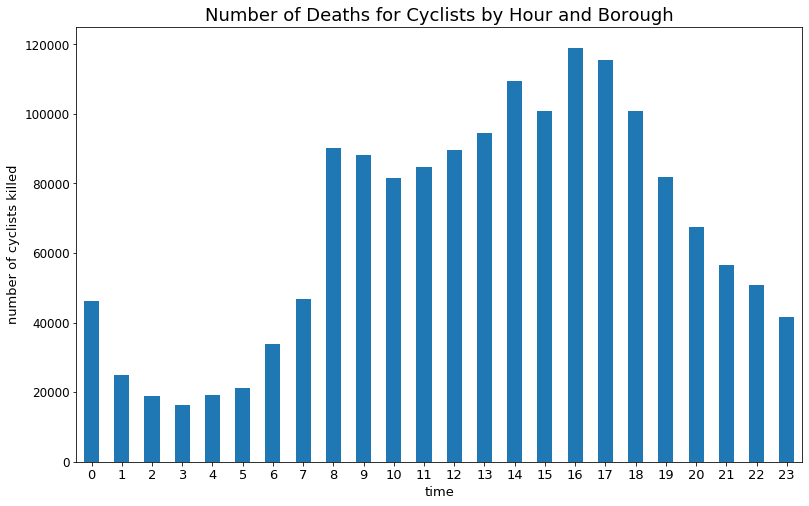

In [13]:
from matplotlib import pyplot as plt

grouped.number_of_cyclist_killed.count().plot(kind='bar', figsize=(13, 8))
plt.title('Number of Deaths for Cyclists by Hour and Borough', fontsize=18)
plt.ylabel('number of cyclists killed', fontsize=13)
plt.xlabel('time', fontsize=13)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=12)

Hmm let's try a different style... maybe something more suitable for time series.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text yticklabel objects>)

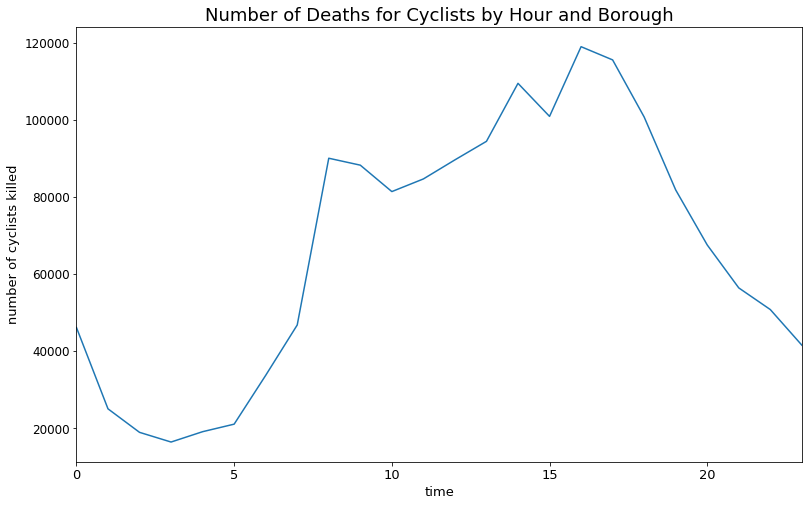

In [12]:
grouped.number_of_cyclist_killed.count().plot(figsize=(13, 8))
plt.title('Number of Deaths for Cyclists by Hour and Borough', fontsize=18)
plt.ylabel('number of cyclists killed', fontsize=13)
plt.xlabel('time', fontsize=13)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=12)

There is an increase in the number of cyclist deaths between 14:00 and 18:00. Interesting.

## Thank you for reading!